# Dataset - 2
## Banking Subscription Prediction
## Logistic Regression using Scikit learn and Stast module 

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Admin\Desktop\Datasets\Banking Subscription Prediction.csv')


In [2]:
#  Head
print(df.head())


     Id    age           job  marital  education default  balance housing  \
0  1001  999.0    management  married   tertiary      no   2143.0     yes   
1  1002   44.0    technician   single  secondary      no     29.0     yes   
2  1003   33.0  entrepreneur  married  secondary      no      2.0     yes   
3  1004   47.0   blue-collar  married    unknown      no   1506.0     yes   
4  1005   33.0       unknown   single    unknown      no      1.0      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may       261         1     -1         0  unknown  no  
1   no  unknown    5   may       151         1     -1         0  unknown  no  
2  yes  unknown    5   may        76         1     -1         0  unknown  no  
3   no  unknown    5   may        92         1     -1         0  unknown  no  
4   no  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
#  Info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB
None


In [4]:
# Describe
print(df.describe())

# Shape
print("Shape of dataset", df.shape)



                 Id           age        balance           day      duration  \
count  45211.000000  45202.000000   45208.000000  45211.000000  45211.000000   
mean   23606.000000     40.954714    1362.346620     15.806419    258.163080   
std    13051.435847     11.539144    3044.852387      8.322476    257.527812   
min     1001.000000     -1.000000   -8019.000000      1.000000      0.000000   
25%    12303.500000     33.000000      72.000000      8.000000    103.000000   
50%    23606.000000     39.000000     448.000000     16.000000    180.000000   
75%    34908.500000     48.000000    1428.000000     21.000000    319.000000   
max    46211.000000    999.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.00

In [5]:
# columns list
print(df.columns)

# Types
print(df.dtypes)

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')
Id             int64
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object


In [6]:
# rename columns
new_column_names = { 'Id': 'ID',  'age': 'Age',  'job': 'Occupation',   'marital': 'MaritalStatus',  'education': 'Education',
    'default': 'HasDefault', 'balance': 'Balance', 'housing': 'HousingLoan', 'loan': 'PersonalLoan', 'contact': 'ContactType',
    'day': 'ContactDay', 'month': 'ContactMonth', 'duration': 'ContactDuration', 'campaign': 'CampaignContacts',
    'pdays': 'DaysSinceLastContact',  'previous': 'PreviousContacts',  'poutcome': 'PreviousOutcome',  'y': 'Subscribed'}

df.rename(columns=new_column_names, inplace=True)

print(df.columns.tolist())
print(df.shape)

['ID', 'Age', 'Occupation', 'MaritalStatus', 'Education', 'HasDefault', 'Balance', 'HousingLoan', 'PersonalLoan', 'ContactType', 'ContactDay', 'ContactMonth', 'ContactDuration', 'CampaignContacts', 'DaysSinceLastContact', 'PreviousContacts', 'PreviousOutcome', 'Subscribed']
(45211, 18)


In [7]:
# Drop columns 
columns_to_drop = ['ID', 'ContactType']
df.drop(columns=columns_to_drop, inplace=True)


In [8]:
print("Columns after dropping 'id' and 'contact_type':")
print(df.columns.tolist())


Columns after dropping 'id' and 'contact_type':
['Age', 'Occupation', 'MaritalStatus', 'Education', 'HasDefault', 'Balance', 'HousingLoan', 'PersonalLoan', 'ContactDay', 'ContactMonth', 'ContactDuration', 'CampaignContacts', 'DaysSinceLastContact', 'PreviousContacts', 'PreviousOutcome', 'Subscribed']


In [9]:
print(df.shape)

(45211, 16)


In [10]:
# missing values 
missing_values = df.isnull().sum()

# columns 
print(missing_values[missing_values > 0])


Age        9
Balance    3
dtype: int64


In [11]:
# Impute missing values with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Balance'].fillna(df['Balance'].mean(), inplace=True)

print(df[['Age', 'Balance']].isnull().sum())


Age        0
Balance    0
dtype: int64


In [12]:
# duplicates 
duplicate_rows = df[df.duplicated()]

print("Number of duplicates", duplicate_rows.shape[0])

Number of duplicates 0


In [13]:
print(df.shape)

(45211, 16)


In [14]:
print(df.describe())

                Age        Balance    ContactDay  ContactDuration  \
count  45211.000000   45211.000000  45211.000000     45211.000000   
mean      40.954714    1362.346620     15.806419       258.163080   
std       11.537995    3044.751361      8.322476       257.527812   
min       -1.000000   -8019.000000      1.000000         0.000000   
25%       33.000000      72.000000      8.000000       103.000000   
50%       39.000000     448.000000     16.000000       180.000000   
75%       48.000000    1428.000000     21.000000       319.000000   
max      999.000000  102127.000000     31.000000      4918.000000   

       CampaignContacts  DaysSinceLastContact  PreviousContacts  
count      45211.000000          45211.000000      45211.000000  
mean           2.763841             40.197828          0.580323  
std            3.098021            100.128746          2.303441  
min            1.000000             -1.000000          0.000000  
25%            1.000000             -1.000000   

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


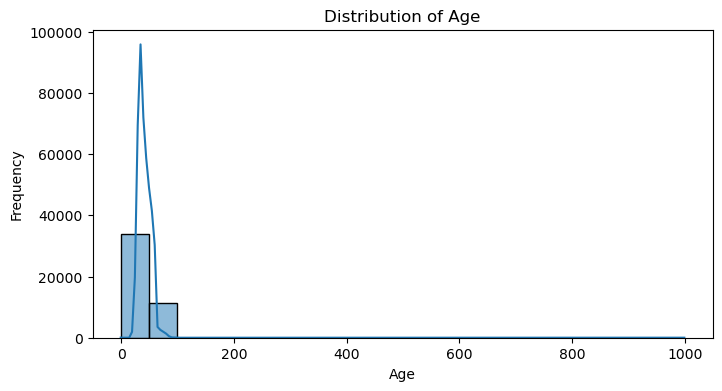

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


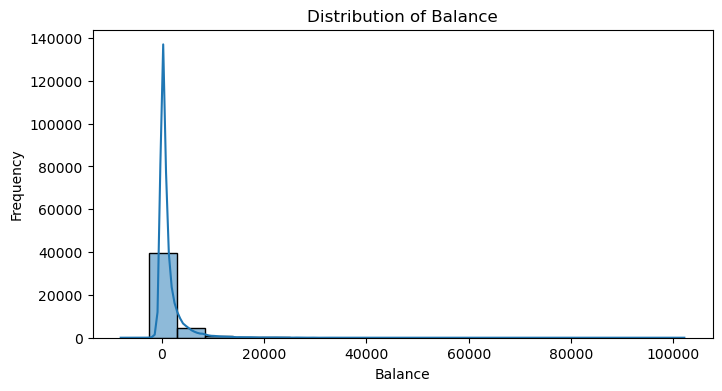

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


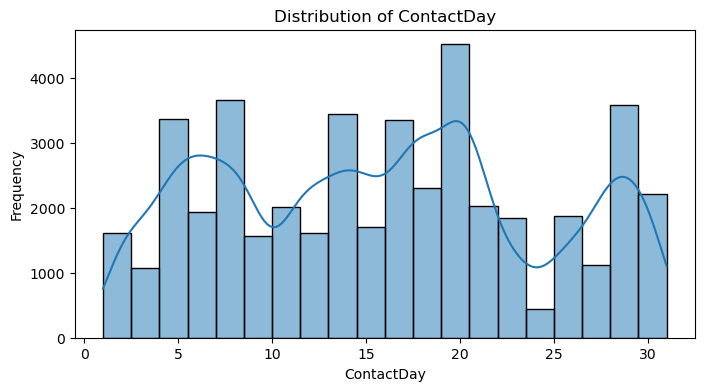

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


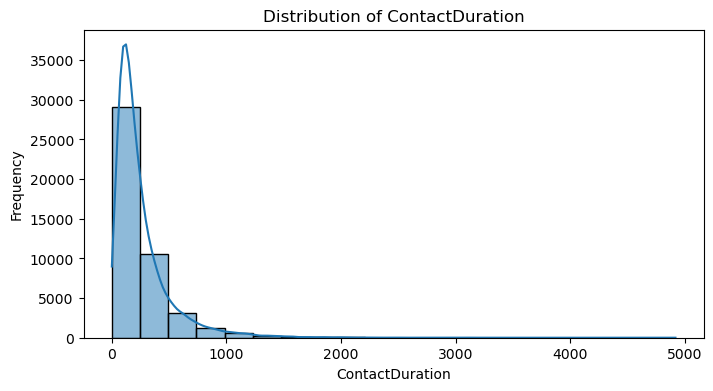

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


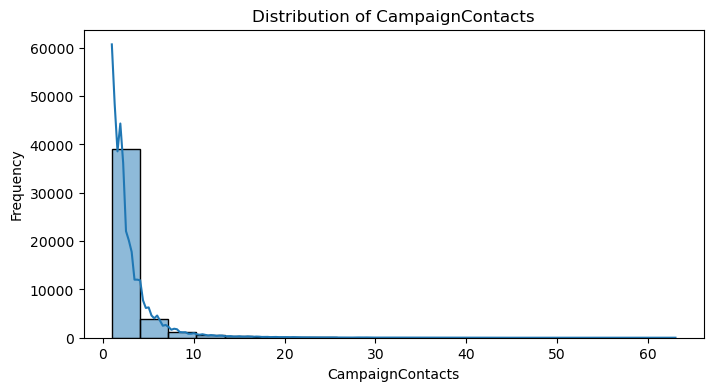

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


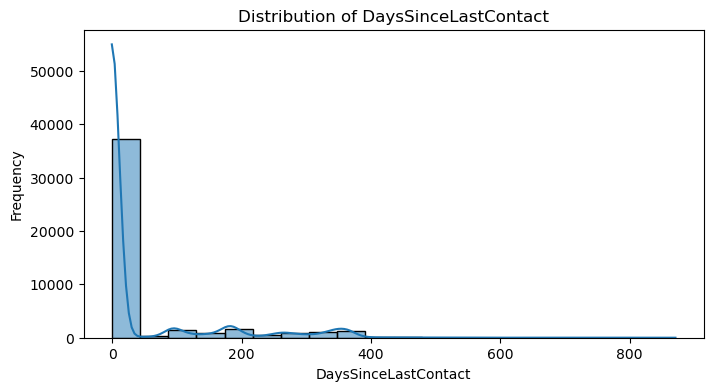

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


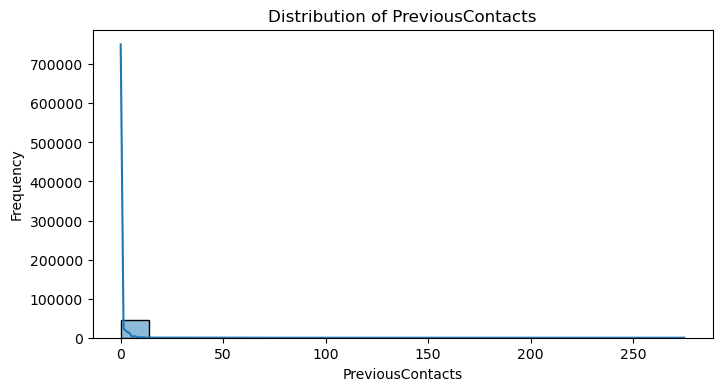

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Variables 
numerical_vars = ['Age', 'Balance', 'ContactDay', 'ContactDuration', 'CampaignContacts', 
                  'DaysSinceLastContact', 'PreviousContacts']


# Visualize 
for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()



Frequency counts for Occupation:
Occupation
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: proportion, dtype: float64


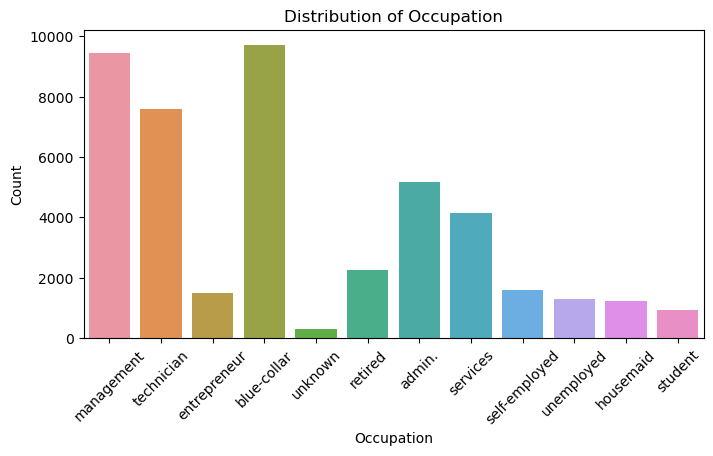


Frequency counts for MaritalStatus:
MaritalStatus
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64


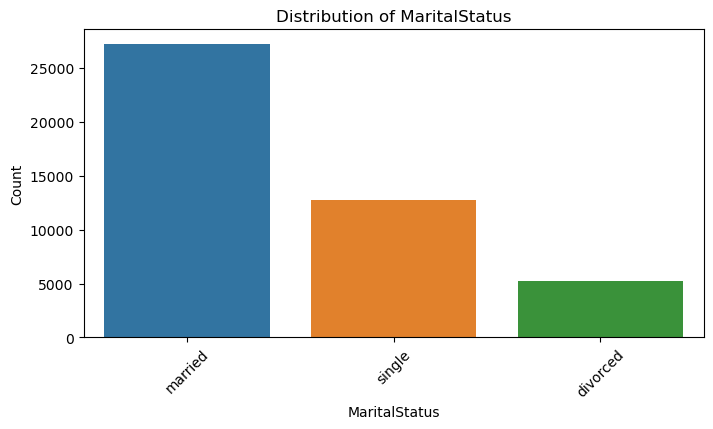


Frequency counts for Education:
Education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64


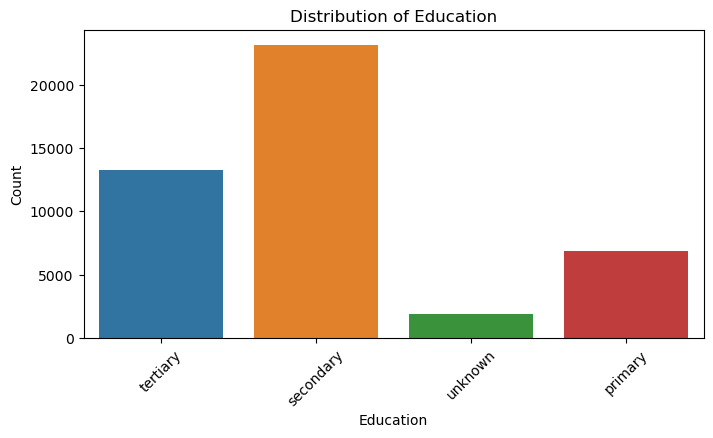


Frequency counts for HasDefault:
HasDefault
no     0.981973
yes    0.018027
Name: proportion, dtype: float64


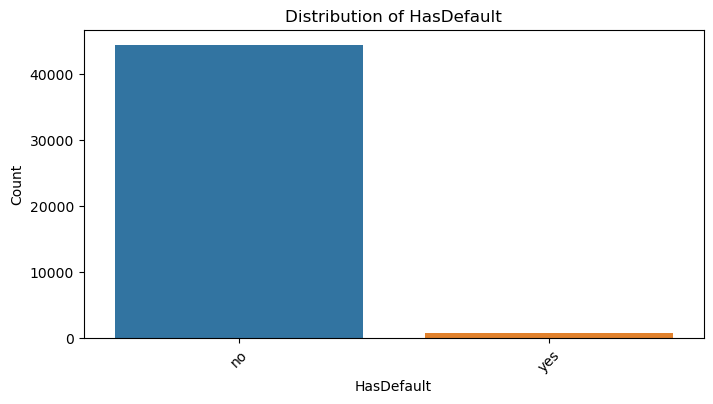


Frequency counts for HousingLoan:
HousingLoan
yes    0.555838
no     0.444162
Name: proportion, dtype: float64


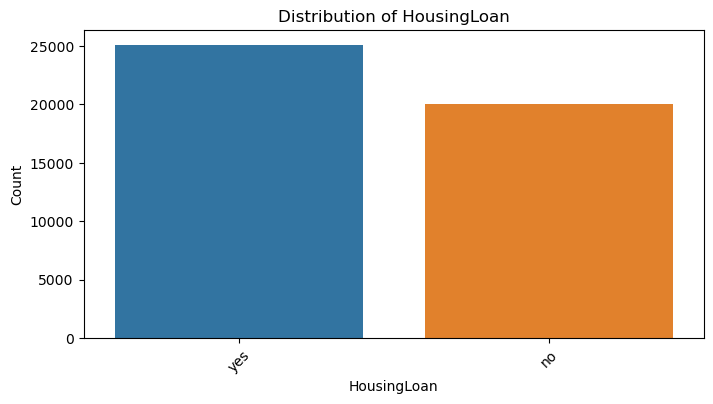


Frequency counts for PersonalLoan:
PersonalLoan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64


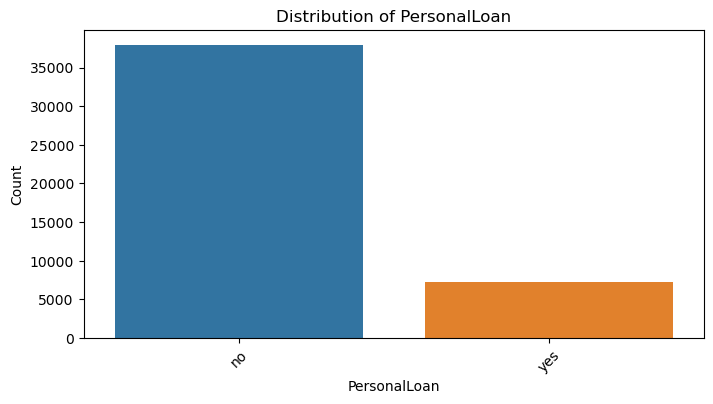


Frequency counts for ContactMonth:
ContactMonth
may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: proportion, dtype: float64


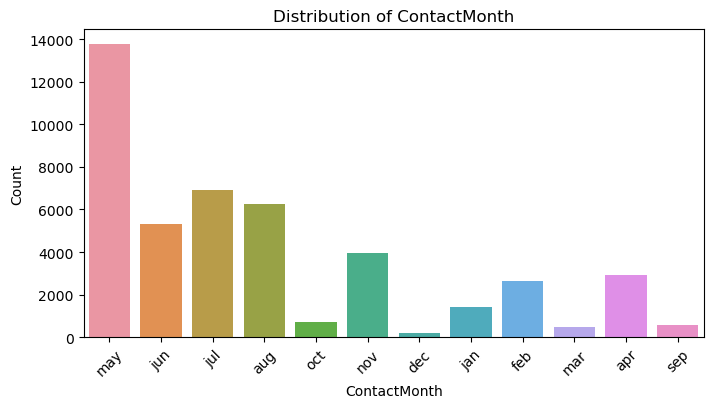


Frequency counts for PreviousOutcome:
PreviousOutcome
unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: proportion, dtype: float64


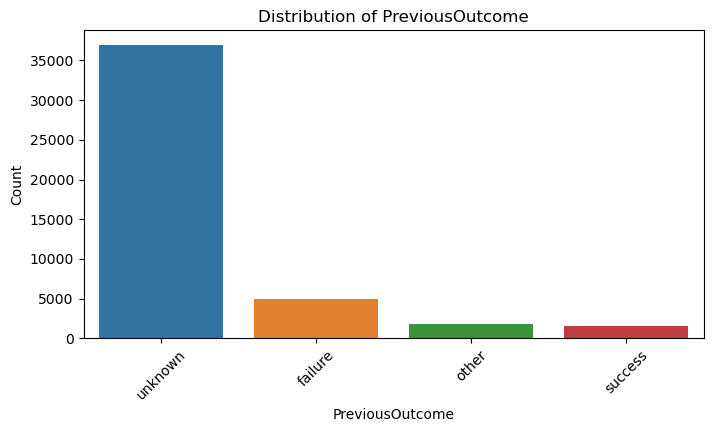


Frequency counts for Subscribed:
Subscribed
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


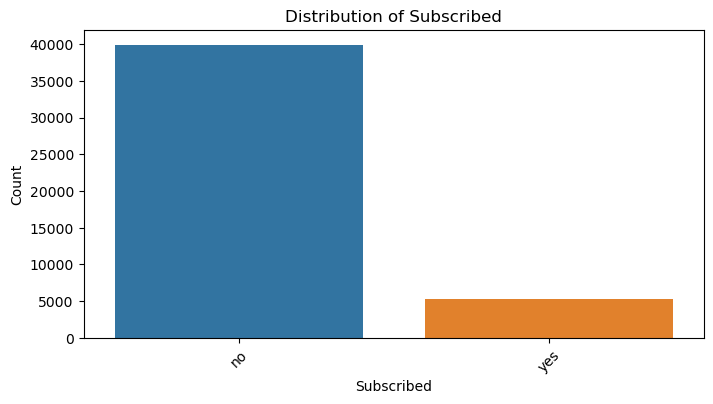

In [16]:
# Categorical Variables 
categorical_vars = ['Occupation', 'MaritalStatus', 'Education', 'HasDefault', 
                    'HousingLoan', 'PersonalLoan', 'ContactMonth', 'PreviousOutcome', 'Subscribed']

# Frequency counts
for var in categorical_vars:
    print(f"\nFrequency counts for {var}:")
    print(df[var].value_counts(normalize=True))

# Visualize 
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

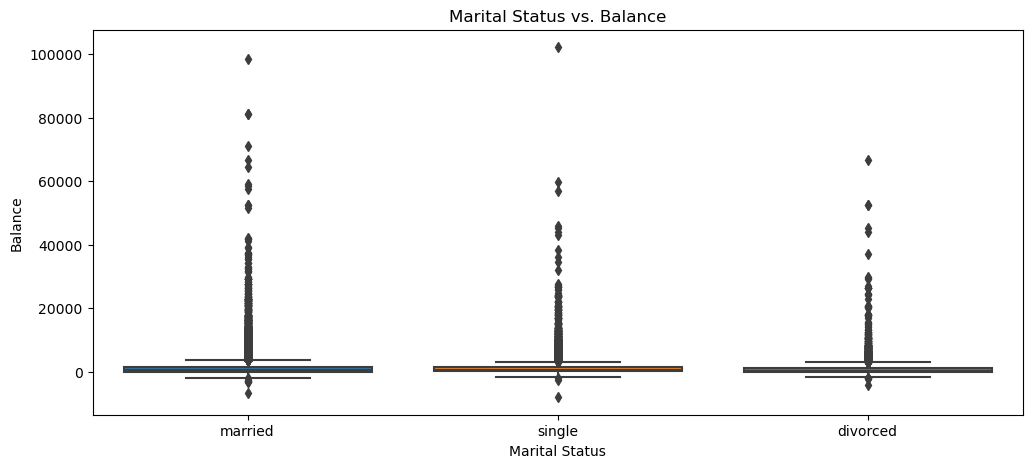

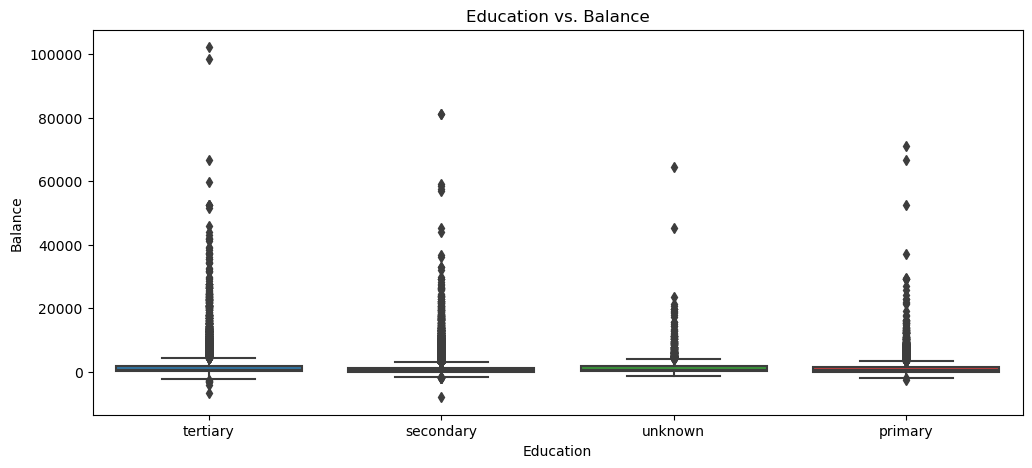

In [17]:

# Bivariate Analysis
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='MaritalStatus', y='Balance')
plt.title('Marital Status vs. Balance')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Education', y='Balance')
plt.title('Education vs. Balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.show()


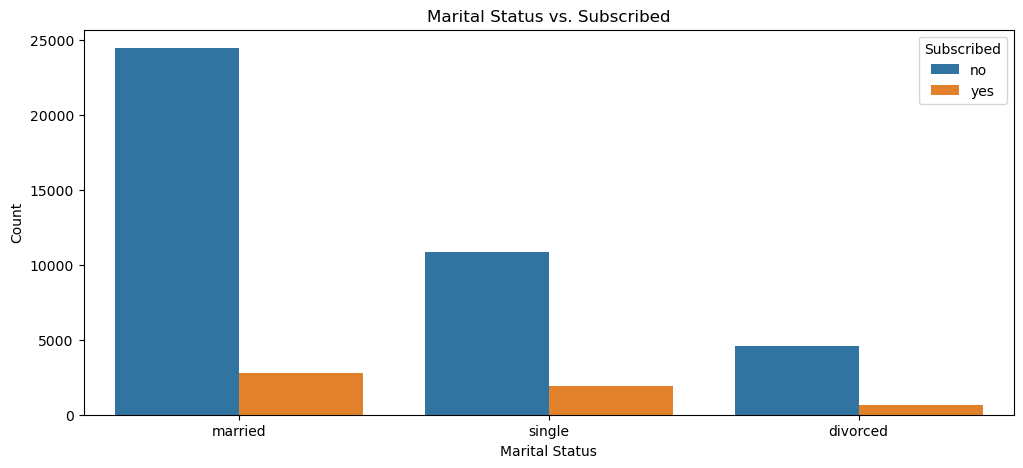

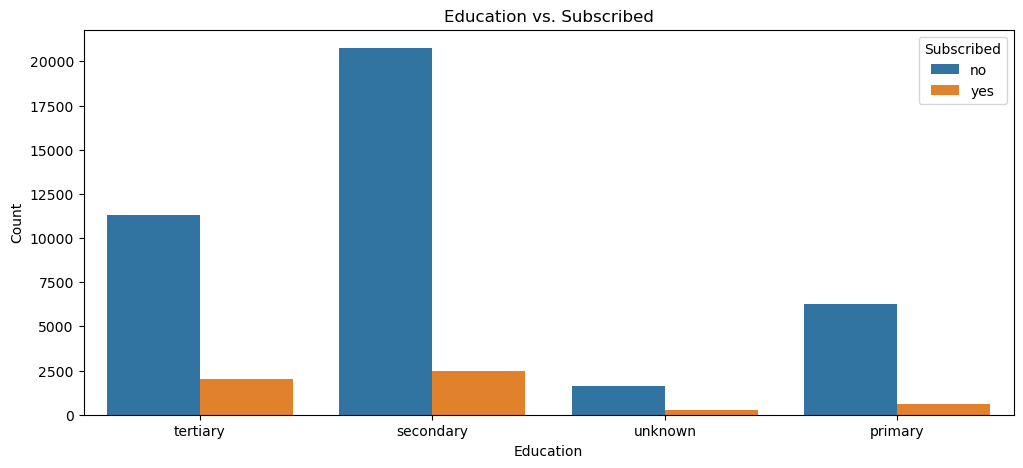

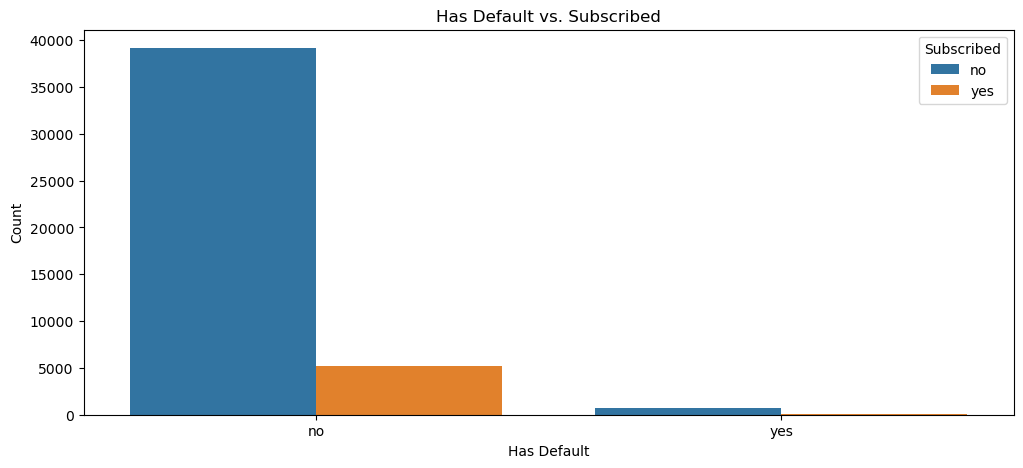

In [18]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='MaritalStatus', hue='Subscribed')
plt.title('Marital Status vs. Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Education', hue='Subscribed')
plt.title('Education vs. Subscribed')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='HasDefault', hue='Subscribed')
plt.title('Has Default vs. Subscribed')
plt.xlabel('Has Default')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right')
plt.show()


In [19]:
# Calculate the IQR for each numerical feature
Q1 = df[numerical_vars].quantile(0.25)
Q3 = df[numerical_vars].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for each numerical feature
outliers = ((df[numerical_vars] < (Q1 - 1.5 * IQR)) | (df[numerical_vars] > (Q3 + 1.5 * IQR))).any()

# Print the features with outliers
print(outliers[outliers == True].index.tolist())


['Age', 'Balance', 'ContactDuration', 'CampaignContacts', 'DaysSinceLastContact', 'PreviousContacts']


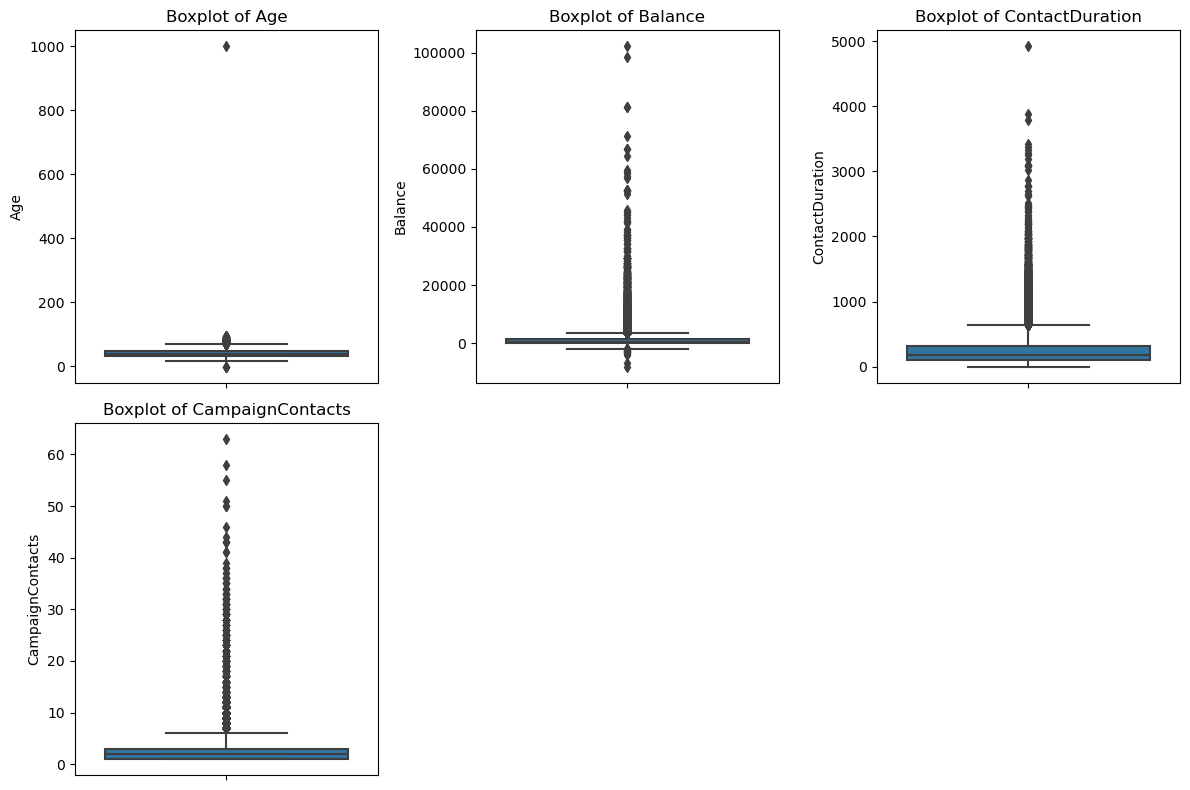

In [20]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 8))

for i, var in enumerate(['Age', 'Balance', 'ContactDuration', 'CampaignContacts'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


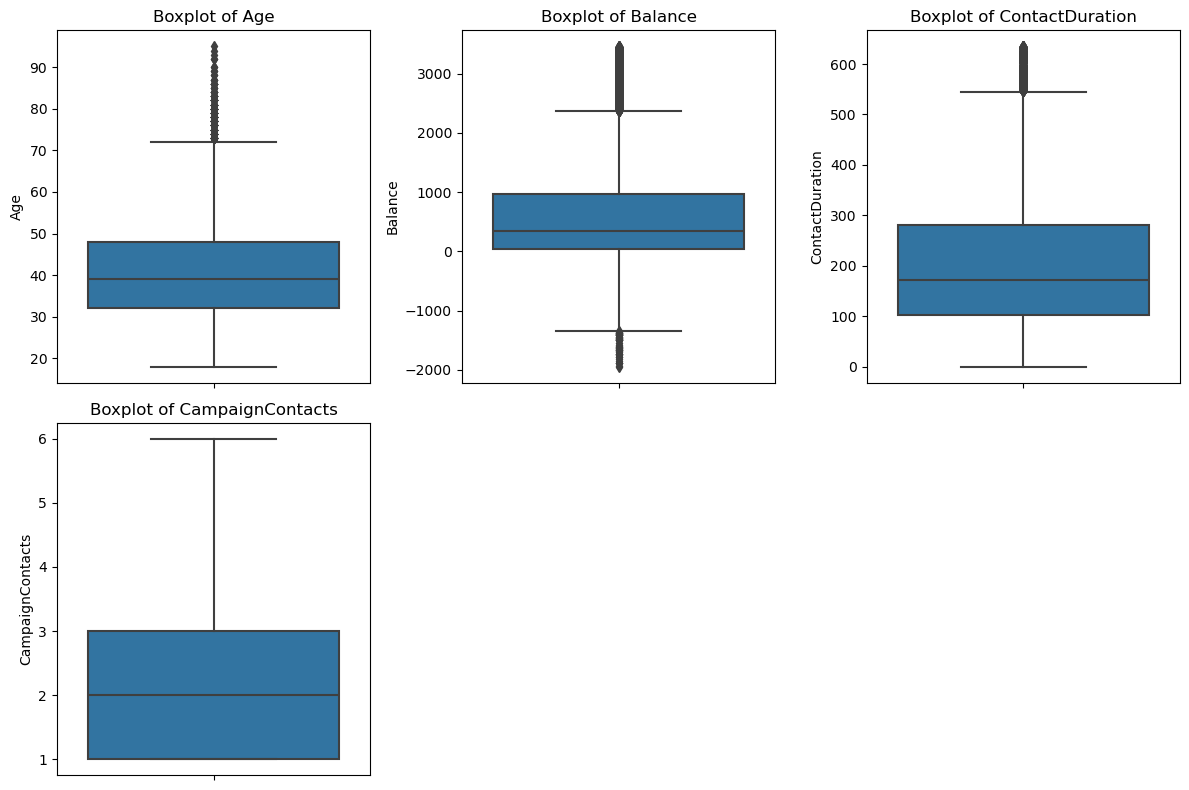

In [21]:
# Remove outliers
df_no_outliers = df.copy()

df_no_outliers = df_no_outliers[(df_no_outliers['Age'] >= 18) & (df_no_outliers['Age'] <= 100)]

Q1_balance = df_no_outliers['Balance'].quantile(0.25)
Q3_balance = df_no_outliers['Balance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance
df_no_outliers = df_no_outliers[(df_no_outliers['Balance'] >= (Q1_balance - 1.5 * IQR_balance)) & (df_no_outliers['Balance'] <= (Q3_balance + 1.5 * IQR_balance))]

Q1_duration = df_no_outliers['ContactDuration'].quantile(0.25)
Q3_duration = df_no_outliers['ContactDuration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
df_no_outliers = df_no_outliers[(df_no_outliers['ContactDuration'] >= (Q1_duration - 1.5 * IQR_duration)) & (df_no_outliers['ContactDuration'] <= (Q3_duration + 1.5 * IQR_duration))]

Q1_campaign = df_no_outliers['CampaignContacts'].quantile(0.25)
Q3_campaign = df_no_outliers['CampaignContacts'].quantile(0.75)
IQR_campaign = Q3_campaign - Q1_campaign
df_no_outliers = df_no_outliers[(df_no_outliers['CampaignContacts'] >= (Q1_campaign - 1.5 * IQR_campaign)) & (df_no_outliers['CampaignContacts'] <= (Q3_campaign + 1.5 * IQR_campaign))]

# Visualize updated distributions using box plots
plt.figure(figsize=(12, 8))

for i, var in enumerate(['Age', 'Balance', 'ContactDuration', 'CampaignContacts'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_no_outliers, y=var)
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


In [22]:
df_no_outliers.shape

(34959, 16)

In [23]:
# categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns ", categorical_cols)


Categorical columns  ['Occupation', 'MaritalStatus', 'Education', 'HasDefault', 'HousingLoan', 'PersonalLoan', 'ContactMonth', 'PreviousOutcome', 'Subscribed']


In [24]:
# number of unique categories 
for col in categorical_cols:
    num_categories = len(df[col].unique())
    print(f"Number of unique categories in {col}    {num_categories}")


Number of unique categories in Occupation    12
Number of unique categories in MaritalStatus    3
Number of unique categories in Education    4
Number of unique categories in HasDefault    2
Number of unique categories in HousingLoan    2
Number of unique categories in PersonalLoan    2
Number of unique categories in ContactMonth    12
Number of unique categories in PreviousOutcome    4
Number of unique categories in Subscribed    2


In [25]:
# one-hot encoding 
df_no_outliers_encoded = pd.get_dummies(df_no_outliers, columns=categorical_cols)

print(df_no_outliers_encoded.head())


    Age  Balance  ContactDay  ContactDuration  CampaignContacts  \
1  44.0     29.0           5              151                 1   
2  33.0      2.0           5               76                 1   
3  47.0   1506.0           5               92                 1   
4  33.0      1.0           5              198                 1   
5  35.0    231.0           5              139                 1   

   DaysSinceLastContact  PreviousContacts  Occupation_admin.  \
1                    -1                 0              False   
2                    -1                 0              False   
3                    -1                 0              False   
4                    -1                 0              False   
5                    -1                 0              False   

   Occupation_blue-collar  Occupation_entrepreneur  ...  ContactMonth_may  \
1                   False                    False  ...              True   
2                   False                     True  ...   

In [26]:
df_no_outliers_encoded.columns


Index(['Age', 'Balance', 'ContactDay', 'ContactDuration', 'CampaignContacts',
       'DaysSinceLastContact', 'PreviousContacts', 'Occupation_admin.',
       'Occupation_blue-collar', 'Occupation_entrepreneur',
       'Occupation_housemaid', 'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services', 'Occupation_student',
       'Occupation_technician', 'Occupation_unemployed', 'Occupation_unknown',
       'MaritalStatus_divorced', 'MaritalStatus_married',
       'MaritalStatus_single', 'Education_primary', 'Education_secondary',
       'Education_tertiary', 'Education_unknown', 'HasDefault_no',
       'HasDefault_yes', 'HousingLoan_no', 'HousingLoan_yes',
       'PersonalLoan_no', 'PersonalLoan_yes', 'ContactMonth_apr',
       'ContactMonth_aug', 'ContactMonth_dec', 'ContactMonth_feb',
       'ContactMonth_jan', 'ContactMonth_jul', 'ContactMonth_jun',
       'ContactMonth_mar', 'ContactMonth_may', 'ContactMonth_nov',
       'ContactMonth_oct

In [27]:
df_no_outliers_encoded.shape

(34959, 50)

In [28]:
# Columns to drop
columns_to_drop = ['Occupation_unknown', 'MaritalStatus_divorced', 'Education_primary', 'HasDefault_no', 
                   'HousingLoan_no', 'PersonalLoan_no', 'ContactMonth_apr', 'PreviousOutcome_failure', 
                   'Subscribed_no']

df_no_outliers_encoded.drop(columns=columns_to_drop, inplace=True)

print(df_no_outliers_encoded.head())


    Age  Balance  ContactDay  ContactDuration  CampaignContacts  \
1  44.0     29.0           5              151                 1   
2  33.0      2.0           5               76                 1   
3  47.0   1506.0           5               92                 1   
4  33.0      1.0           5              198                 1   
5  35.0    231.0           5              139                 1   

   DaysSinceLastContact  PreviousContacts  Occupation_admin.  \
1                    -1                 0              False   
2                    -1                 0              False   
3                    -1                 0              False   
4                    -1                 0              False   
5                    -1                 0              False   

   Occupation_blue-collar  Occupation_entrepreneur  ...  ContactMonth_jun  \
1                   False                    False  ...             False   
2                   False                     True  ...   

In [29]:
print(df_no_outliers_encoded.columns)

Index(['Age', 'Balance', 'ContactDay', 'ContactDuration', 'CampaignContacts',
       'DaysSinceLastContact', 'PreviousContacts', 'Occupation_admin.',
       'Occupation_blue-collar', 'Occupation_entrepreneur',
       'Occupation_housemaid', 'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services', 'Occupation_student',
       'Occupation_technician', 'Occupation_unemployed',
       'MaritalStatus_married', 'MaritalStatus_single', 'Education_secondary',
       'Education_tertiary', 'Education_unknown', 'HasDefault_yes',
       'HousingLoan_yes', 'PersonalLoan_yes', 'ContactMonth_aug',
       'ContactMonth_dec', 'ContactMonth_feb', 'ContactMonth_jan',
       'ContactMonth_jul', 'ContactMonth_jun', 'ContactMonth_mar',
       'ContactMonth_may', 'ContactMonth_nov', 'ContactMonth_oct',
       'ContactMonth_sep', 'PreviousOutcome_other', 'PreviousOutcome_success',
       'PreviousOutcome_unknown', 'Subscribed_yes'],
      dtype='object')


In [30]:
# Calculate correlation 
correlation = df_no_outliers_encoded.corr()['Subscribed_yes'].abs().sort_values(ascending=False)

print(correlation)


Subscribed_yes              1.000000
PreviousOutcome_success     0.363885
ContactDuration             0.258207
PreviousOutcome_unknown     0.202384
HousingLoan_yes             0.167973
ContactMonth_mar            0.160296
ContactMonth_oct            0.146018
ContactMonth_sep            0.144504
DaysSinceLastContact        0.125092
ContactMonth_may            0.123224
PreviousContacts            0.111282
Balance                     0.097275
Occupation_student          0.094149
Occupation_blue-collar      0.085348
Occupation_retired          0.085333
ContactMonth_dec            0.083206
CampaignContacts            0.081891
PersonalLoan_yes            0.079909
Education_tertiary          0.075483
MaritalStatus_single        0.064017
MaritalStatus_married       0.054663
ContactMonth_jul            0.049849
ContactMonth_feb            0.042336
PreviousOutcome_other       0.038711
Education_secondary         0.037186
Occupation_management       0.036886
Occupation_services         0.033699
C

In [31]:
# Columns to drop
columns_to_drop = ['Occupation_self-employed', 'ContactMonth_aug', 'Occupation_technician', 
                   'ContactMonth_jun', 'Occupation_admin.', 'Occupation_housemaid', 
                   'ContactMonth_nov', 'ContactMonth_jan', 'Education_unknown', 
                   'Occupation_unemployed']

# Drop the specified columns
df_no_outliers_encoded = df_no_outliers_encoded.drop(columns=columns_to_drop)

# Print the shape of the dataframe after dropping columns
print(df_no_outliers_encoded.shape)


(34959, 31)


In [32]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
label_encoder = LabelEncoder()

for col in df_no_outliers_encoded.select_dtypes(include=['object']).columns:
    # Apply label encoding to each column
    df_no_outliers_encoded[col] = label_encoder.fit_transform(df_no_outliers_encoded[col])

print(df_no_outliers_encoded.head())


    Age  Balance  ContactDay  ContactDuration  CampaignContacts  \
1  44.0     29.0           5              151                 1   
2  33.0      2.0           5               76                 1   
3  47.0   1506.0           5               92                 1   
4  33.0      1.0           5              198                 1   
5  35.0    231.0           5              139                 1   

   DaysSinceLastContact  PreviousContacts  Occupation_blue-collar  \
1                    -1                 0                   False   
2                    -1                 0                   False   
3                    -1                 0                    True   
4                    -1                 0                   False   
5                    -1                 0                   False   

   Occupation_entrepreneur  Occupation_management  ...  ContactMonth_feb  \
1                    False                  False  ...             False   
2                     True    

In [33]:
# Convert to numeric 
bool_columns = ['Occupation_blue-collar', 'Occupation_entrepreneur', 'Occupation_management',
                'Occupation_retired', 'Occupation_services', 'Occupation_student',
                'MaritalStatus_married', 'MaritalStatus_single', 'Education_secondary',
                'Education_tertiary', 'HasDefault_yes', 'HousingLoan_yes', 'PersonalLoan_yes',
                'ContactMonth_dec', 'ContactMonth_feb',
                'ContactMonth_jul', 'ContactMonth_mar', 'ContactMonth_may',
                 'ContactMonth_oct', 'ContactMonth_sep',
                'PreviousOutcome_other', 'PreviousOutcome_success', 'PreviousOutcome_unknown',
                'Subscribed_yes']

df_no_outliers_encoded[bool_columns] = df_no_outliers_encoded[bool_columns].astype(int)

print(df_no_outliers_encoded.head())


    Age  Balance  ContactDay  ContactDuration  CampaignContacts  \
1  44.0     29.0           5              151                 1   
2  33.0      2.0           5               76                 1   
3  47.0   1506.0           5               92                 1   
4  33.0      1.0           5              198                 1   
5  35.0    231.0           5              139                 1   

   DaysSinceLastContact  PreviousContacts  Occupation_blue-collar  \
1                    -1                 0                       0   
2                    -1                 0                       0   
3                    -1                 0                       1   
4                    -1                 0                       0   
5                    -1                 0                       0   

   Occupation_entrepreneur  Occupation_management  ...  ContactMonth_feb  \
1                        0                      0  ...                 0   
2                        1    

In [34]:
from sklearn.preprocessing import MinMaxScaler

# normalization
numerical_columns = ['Age', 'Balance', 'ContactDay', 'ContactDuration', 'CampaignContacts', 
                     'DaysSinceLastContact', 'PreviousContacts']

# MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform 
df_no_outliers_encoded[numerical_columns] = scaler.fit_transform(df_no_outliers_encoded[numerical_columns])

print(df_no_outliers_encoded.head())


        Age   Balance  ContactDay  ContactDuration  CampaignContacts  \
1  0.337662  0.365100    0.133333         0.237795               0.0   
2  0.194805  0.360104    0.133333         0.119685               0.0   
3  0.376623  0.638416    0.133333         0.144882               0.0   
4  0.194805  0.359919    0.133333         0.311811               0.0   
5  0.220779  0.402480    0.133333         0.218898               0.0   

   DaysSinceLastContact  PreviousContacts  Occupation_blue-collar  \
1                   0.0               0.0                       0   
2                   0.0               0.0                       0   
3                   0.0               0.0                       1   
4                   0.0               0.0                       0   
5                   0.0               0.0                       0   

   Occupation_entrepreneur  Occupation_management  ...  ContactMonth_feb  \
1                        0                      0  ...                 0   


In [35]:
from sklearn.model_selection import train_test_split

# x and y variable 
X = df_no_outliers_encoded.drop(columns=['Subscribed_yes'])  # Features
y = df_no_outliers_encoded['Subscribed_yes']  # Target variable

# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train  ", X_train.shape)
print("Shape of X_test  ", X_test.shape)
print("Shape of y_train  ", y_train.shape)
print("Shape of y_test  ", y_test.shape)


Shape of X_train   (24471, 30)
Shape of X_test   (10488, 30)
Shape of y_train   (24471,)
Shape of y_test   (10488,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

# logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Confusion  matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.92372234935164
F1 Score: 0.39209726443769
Confusion Matrix:
[[9430  145]
 [ 655  258]]
Precision: 0.6401985111662531
Recall: 0.28258488499452356
F1 Score: 0.39209726443769


In [38]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

X_train_with_const = sm.add_constant(X_train)

# logistic regression model
logit_model = sm.Logit(y_train, X_train_with_const)

# Fit the model
logit_result = logit_model.fit()

print(logit_result.summary())

# Predict class 1 for the test set
X_test_with_const = sm.add_constant(X_test)
y_pred_probs = logit_result.predict(X_test_with_const)

y_pred = (y_pred_probs >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)



Optimization terminated successfully.
         Current function value: 0.197053
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Subscribed_yes   No. Observations:                24471
Model:                          Logit   Df Residuals:                    24440
Method:                           MLE   Df Model:                           30
Date:                Fri, 10 May 2024   Pseudo R-squ.:                  0.3249
Time:                        08:24:13   Log-Likelihood:                -4822.1
converged:                       True   LL-Null:                       -7142.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.1493      0.232    -17.883      0.000      -4.604   